# Basics: Multi-wavelength maps
New in version 0.2.1 is the ability for users to instantiate wavelength-dependent maps. Nearly all of the computational overhead in `starry` comes from computing rotation matrices and integrals of the Green's basis functions, which makes it **really** fast to compute light curves at different wavelengths if we simply recycle the results of all of these operations.

By "wavelength-dependent map" we mean a map whose spherical harmonic coefficients are a function of wavelength. Specifically, instead of setting the coefficient at $l, m$ to a scalar value, we can set it to a vector, where each element corresponds to the coefficient in a particular wavelength bin. Let's look at some examples.

## Instantiating multi-wavelength maps

The key is to pass the `nwav` keyword when instantiating a `starry` object. For simplicity, let's do `nwav=3`, corresponding to three wavelength bins.

In [ ]:
%matplotlib inline

In [1]:
from starry import Map
map = Map(lmax=2, nwav=3)

Recall that the map coefficients are now *vectors*. Here's what the coefficient *matrix* now looks like:

In [2]:
map.y

array([[1., 1., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

Each row corresponds to a given spherical harmonic, and each column to a given wavelength bin. Let's set the $Y_{1,0}$ coefficient:

In [3]:
map[1, 0] = [0.3, 0.4, 0.5]

Here's our new map vector:

In [4]:
map.y

array([[1. , 1. , 1. ],
       [0. , 0. , 0. ],
       [0.3, 0.4, 0.5],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ]])

To visualize the map, we can call `map.show()` as usual, but now we actually get an *animation* showing us what the map looks like at each wavelength.

In [5]:
map.show()

(*Caveat: the* `map.animate()` *routine is disabled for multi-wavelength maps.*)

Let's set a few more coefficients:

In [12]:
map[1, -1] = [0, 0.1, -0.1]
map[2, -1] = [-0.1, -0.2, -0.1]
map[2, 2] = [0.3, 0.2, 0.1]

In [13]:
map.show()

OK, our map now has some interesting wavelength-dependent features. Let's compute some light curves! First, a simple phase curve:

In [16]:
import numpy as np
theta = np.linspace(0, 360, 1000)
map.axis = [0, 1, 0]
phase_curve = map.flux(theta=theta)

Let's plot it. The blue line is the first wavelength bin, the orange line is the second bin, and the green line is the third:

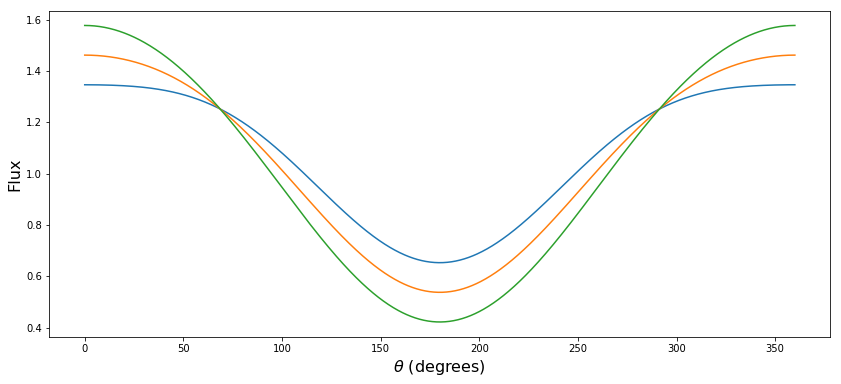

In [25]:
import matplotlib.pyplot as pl
%matplotlib inline

fig, ax = pl.subplots(1, figsize=(14, 6))
ax.plot(theta, phase_curve);
ax.set_xlabel(r'$\theta$ (degrees)', fontsize=16)
ax.set_ylabel('Flux', fontsize=16);

We can also compute an occultation light curve:

In [26]:
xo = np.linspace(-1.5, 1.5, 1000)
light_curve = map.flux(xo=xo, yo=0.2, ro=0.1)

Let's plot it. This time we normalize the light curve by the baseline for better plotting, since the map has a different total flux at each wavelength:

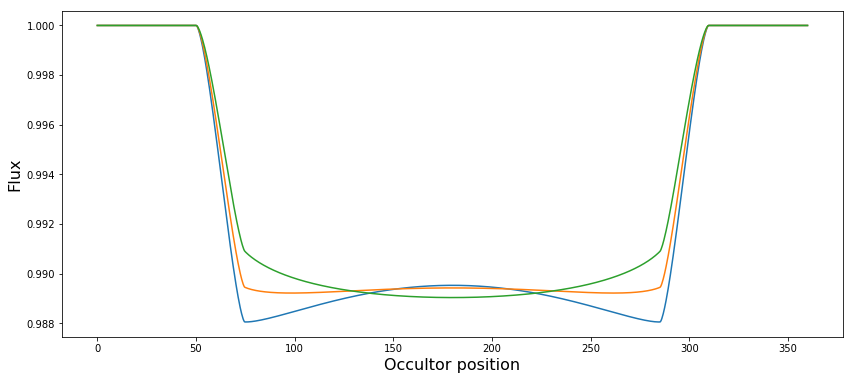

In [29]:
fig, ax = pl.subplots(1, figsize=(14, 6))
ax.plot(theta, light_curve / light_curve[0]);
ax.set_xlabel('Occultor position', fontsize=16)
ax.set_ylabel('Flux', fontsize=16);

As we mentioned above, there's not that much overhead to computing light curves in many different wavelength bins. Check it out:

In [76]:
import time
np.random.seed(1234)
def runtime(nwav, N=10):
    total_time = 0
    xo = np.linspace(-1.5, 1.5, 1000)
    for n in range(N):
        map = Map(lmax=2, nwav=nwav)
        map[:, :] = np.random.randn(9, nwav)
        tstart = time.time()
        map.flux(xo=xo, yo=0.2, ro=0.1)
        total_time += time.time() - tstart
    return total_time / N

In [79]:
nwav = np.arange(1, 50)
t = [runtime(n) for n in nwav]

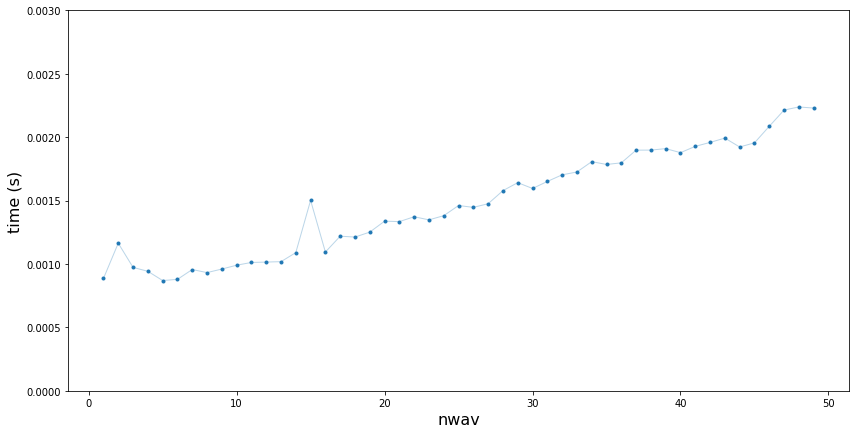

In [89]:
fig, ax = pl.subplots(1, figsize=(14, 7))
ax.plot(nwav, t, '.')
ax.plot(nwav, t, '-', color='C0', lw=1, alpha=0.3)
ax.set_xlabel('nwav', fontsize=16)
ax.set_ylabel('time (s)', fontsize=16);
ax.set_ylim(0, 0.003);